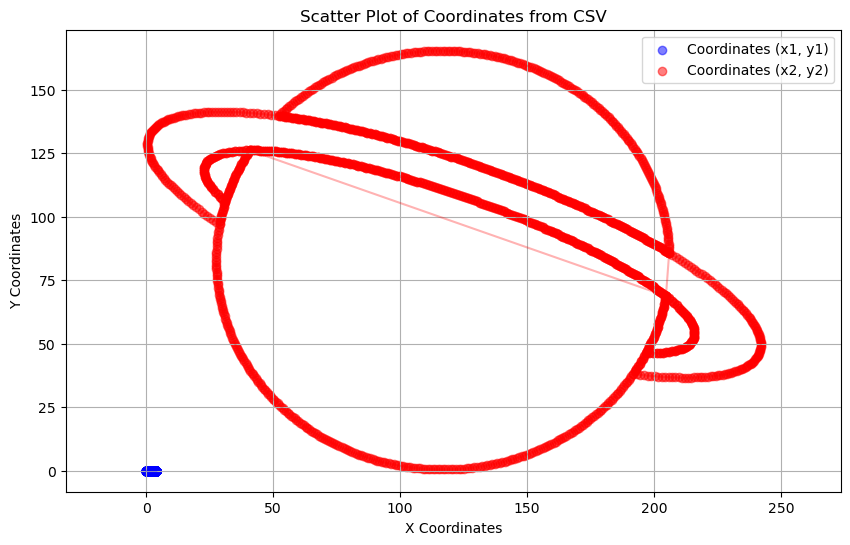

In [7]:
import csv
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = '../problems/occlusion2.csv'

# Initialize lists to store coordinates
x1 = []
y1 = []
x2 = []
y2 = []

# Read the CSV file
with open(csv_file_path, mode='r', newline='') as file:
    csv_reader = csv.reader(file)
    
    # Iterate through the rows and extract coordinates
    for row in csv_reader:
        x1.append(float(row[0]))  # First column as x1
        y1.append(float(row[1]))  # Second column as y1
        x2.append(float(row[2]))  # Third column as x2
        y2.append(float(row[3]))  # Fourth column as y2

# Plot the coordinates
plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, color='blue', label='Coordinates (x1, y1)', alpha=0.5)
plt.scatter(x2, y2, color='red', label='Coordinates (x2, y2)', alpha=0.5)

# Optionally, connect the points with lines
plt.plot(x1, y1, color='blue', alpha=0.3)
plt.plot(x2, y2, color='red', alpha=0.3)

# Add labels and title
plt.title('Scatter Plot of Coordinates from CSV')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.legend()
plt.grid()

# Show the plot
plt.axis('equal')
plt.show()

In [8]:
# input
shape = list(zip(x1, y1, x2, y2)) 

In [9]:
shape[1:4]

[(0.0, 0.0, 39.296810150146484, 126.10030364990234),
 (0.0, 0.0, 37.82154846191406, 126.03954315185547),
 (0.0, 0.0, 36.407474517822266, 125.94754791259766)]

All Bézier curves have reflectional symmetry about the y-axis.


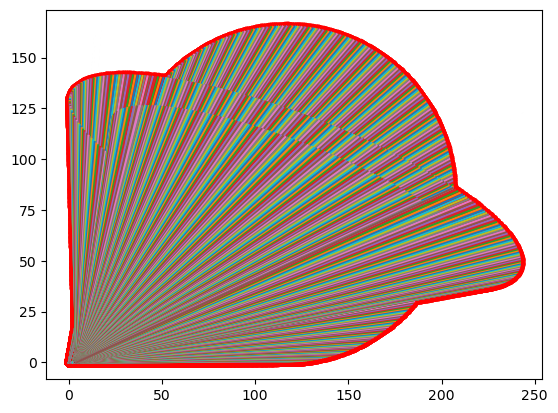

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define a cubic Bézier curve with control points
def bezier(t, P0, P1, P2, P3):
    return (1-t)**3 * P0 + 3*(1-t)**2 * t * P1 + 3*(1-t) * t**2 * P2 + t**3 * P3

# Sample points along the Bézier curve
def sample_bezier(P0, P1, P2, P3, num_points=100):
    t_values = np.linspace(0, 1, num_points)
    points = np.array([bezier(t, P0, P1, P2, P3) for t in t_values])
    return points

# Function to check for symmetry in Bézier curves
def check_bezier_symmetry(control_points, num_points=100):
    # Unpack control points
    P0, P1, P2, P3 = [np.array(point) for point in control_points]
    
    # Sample points along the Bézier curve
    points = sample_bezier(P0, P1, P2, P3, num_points)
    
    # Check for reflectional symmetry about the y-axis
    symmetric_points = [(x, y) for x, y in points if (-x, y) in points]
    
    # Plot the original Bézier curve
    plt.plot(points[:, 0], points[:, 1], label='Bézier Curve')
    
    # Plot symmetric points
    if symmetric_points:
        symmetric_points = np.array(symmetric_points)
        plt.scatter(symmetric_points[:, 0], symmetric_points[:, 1], color='red', label='Symmetric Points')
    
    return len(symmetric_points) > 0  # Return True if there are symmetric points

# Your array of control points
control_points_array = shape

# Initialize a flag to track if all curves have symmetry
all_curves_symmetric = True

# Loop through the array and check symmetry for each set of control points
for control_points in control_points_array:
    # Convert the tuple to a list of control points
    P0 = np.array(control_points[0:2])  # First two values as P0
    P1 = np.array(control_points[0:2])  # Using the same values for P1
    P2 = np.array(control_points[2:4])  # Last two values as P2
    P3 = np.array(control_points[2:4])  # Using the same values for P3
    
    # Check symmetry
    has_symmetry = check_bezier_symmetry([P0, P1, P2, P3])
    
    if not has_symmetry:
        all_curves_symmetric = False
        break  # Exit the loop if any curve doesn't have symmetry

# Print the result
if all_curves_symmetric:
    print("All Bézier curves have reflectional symmetry about the y-axis.")
else:
    print("Not all Bézier curves have reflectional symmetry about the y-axis.")

In [11]:
# Convert to set for easier lookup
original_points = set((x, y) for x, y, _, _ in control_points_array)

# Check for reflectional symmetry about the y-axis
reflection_symmetric = True
for x, y in original_points:
    if (-x, y) not in original_points:
        reflection_symmetric = False
        break

# Check for rotational symmetry (example: 180 degrees around the origin)
rotational_symmetric = True
for x, y in original_points:
    if (-x, -y) not in original_points:
        rotational_symmetric = False
        break

# Output the results
if reflection_symmetric:
    print("The shape has reflectional symmetry about the y-axis.")
else:
    print("The shape does not have reflectional symmetry about the y-axis.")

if rotational_symmetric:
    print("The shape has rotational symmetry about the origin.")
else:
    print("The shape does not have rotational symmetry about the origin.")

The shape does not have reflectional symmetry about the y-axis.
The shape does not have rotational symmetry about the origin.
